## Trump Tweet Analysis

This is just some basic analysis of the first ~33,000 Trump tweets. Looking for word trends etc.

In [48]:
import pandas as pd

df = pd.read_json('trump_tweets_archive.json')
df.head()

,created_at,id_str,retweet_count,source,text
0,2018-02-07 22:36:15,961368036782628864,8917,Twitter for iPhone,The Budget Agreement today is so important for...
1,2018-02-07 22:13:16,961362249880252416,4972,Media Studio,Congratulations to the Republic of Korea on wh...
2,2018-02-07 18:01:05,961298788219420672,8332,Media Studio,Best wishes to the Republic of Korea on hostin...
3,2018-02-07 16:10:00,961270833569202176,31114,Twitter for iPhone,NEW FBI TEXTS ARE BOMBSHELLS!
4,2018-02-07 14:59:49,961253168968622080,16301,Twitter for iPhone,"In the â€œold days,â€� when good news was repo..."


First, going to look at breakdown of time-of-tweet frequency across years before and during presidency

In [56]:
from datetime import date

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['weekday'] = df.apply(lambda row: row['created_at'].dayofweek, axis=1)
df['hour'] = df.apply(lambda row: row['created_at'].hour, axis=1)
df['year'] = df.apply(lambda row: row['created_at'].year, axis=1)
df['month'] = df.apply(lambda row: row['created_at'].month, axis=1)
df['weekday_str'] = df.apply(lambda row: days[row['weekday']], axis=1)

df.head()

,created_at,id_str,retweet_count,source,text,weekday,hour,year,weekday_str,month
0,2018-02-07 22:36:15,961368036782628864,8917,Twitter for iPhone,The Budget Agreement today is so important for...,2,22,2018,Wednesday,2
1,2018-02-07 22:13:16,961362249880252416,4972,Media Studio,Congratulations to the Republic of Korea on wh...,2,22,2018,Wednesday,2
2,2018-02-07 18:01:05,961298788219420672,8332,Media Studio,Best wishes to the Republic of Korea on hostin...,2,18,2018,Wednesday,2
3,2018-02-07 16:10:00,961270833569202176,31114,Twitter for iPhone,NEW FBI TEXTS ARE BOMBSHELLS!,2,16,2018,Wednesday,2
4,2018-02-07 14:59:49,961253168968622080,16301,Twitter for iPhone,"In the â€œold days,â€� when good news was repo...",2,14,2018,Wednesday,2


Text(0.5,1,'Tweet Frequency')

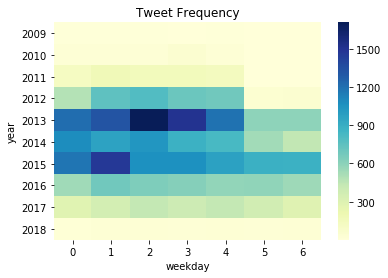

In [57]:
import seaborn as sns
%matplotlib inline

grouped = df.groupby(['year','weekday'])
cntdf = pd.DataFrame({'count' : grouped.size()}).reset_index()
piv = cntdf.pivot('year','weekday','count')
sns.heatmap(piv, cmap="YlGnBu").set_title('Tweet Frequency')

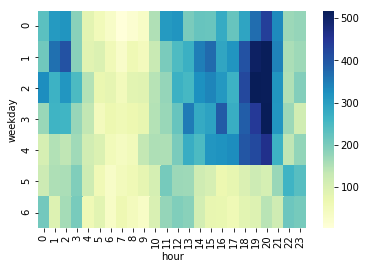

In [58]:
grouped2 = df.groupby(['weekday','hour'])
cntdf2 = pd.DataFrame({'count' : grouped2.size()}).reset_index()
piv2 = cntdf2.pivot('weekday','hour','count')
sns.heatmap(piv2, cmap="YlGnBu").set_title('Tweet Frequency')

Text(0.5,1,'Tweet Frequency')

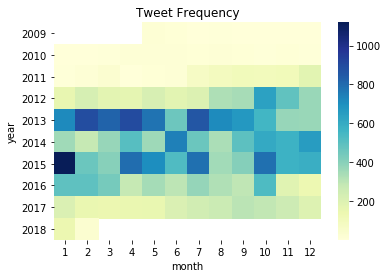

In [60]:
grouped2 = df.groupby(['year','month'])
cntdf2 = pd.DataFrame({'count' : grouped2.size()}).reset_index()
piv2 = cntdf2.pivot('year','month','count')
sns.heatmap(piv2, cmap="YlGnBu").set_title('Tweet Frequency')